Projeto de ciência de dados que análisa e prevê a tendência que um cliente tem de abandonar uma instituição bancária.

Carregamento de dados

In [201]:
import pandas as pd

In [200]:
base = pd.read_csv('Customer-Churn-Records.csv')

Renomeando campos 

In [203]:
base.rename(columns={'RowNumber':'Numeros_Clientes',
                      'CustomerId':'ClienteID',
                      'Surname':'Nome',
                      'CreditScore':'Score_Credito',
                      'Geography':'Geografia',
                      'Gender':'Gênero',
                      'Age':'Idade',
                      'Tenure':'Mandato',
                      'Balance':'Saldo',
                      'NumOfProducts':'Numero_Produtos',
                      'HasCrCard':'TemCartCredito',
                      'IsActiveMember':'É_Membro_Ativo',
                      'EstimatedSalary':'Salario_Estimado',
                      'Exited':'Saiu',
                      'Complain':'Reclamação',
                      'Satisfaction Score':'pontuação_satisfação_score',
                      'Card Type':'Tipo_Cartao',
                      'Point Earned':'Ponto_Ganho'}, inplace=True)

In [45]:
base.head()

,Numeros_Clientes,ClienteID,Nome,Score_Credito,Geografia,Gênero,Idade,Mandato,Saldo,Numero_Produtos,TemCartCredito,É_Membro_Ativo,Salario_Estimado,Saiu,Reclamar,pontuação_satisfação_score,Tipo_Cartao,Ponto_Ganho
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Limpeza e Pre - processamento de Dados

In [46]:
# Verificando os primeiras celulas
base.head()

,Numeros_Clientes,ClienteID,Nome,Score_Credito,Geografia,Gênero,Idade,Mandato,Saldo,Numero_Produtos,TemCartCredito,É_Membro_Ativo,Salario_Estimado,Saiu,Reclamar,pontuação_satisfação_score,Tipo_Cartao,Ponto_Ganho
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [47]:
# Verificando os tipos de variáveis 
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numeros_Clientes            10000 non-null  int64  
 1   ClienteID                   10000 non-null  int64  
 2   Nome                        10000 non-null  object 
 3   Score_Credito               10000 non-null  int64  
 4   Geografia                   10000 non-null  object 
 5   Gênero                      10000 non-null  object 
 6   Idade                       10000 non-null  int64  
 7   Mandato                     10000 non-null  int64  
 8   Saldo                       10000 non-null  float64
 9   Numero_Produtos             10000 non-null  int64  
 10  TemCartCredito              10000 non-null  int64  
 11  É_Membro_Ativo              10000 non-null  int64  
 12  Salario_Estimado            10000 non-null  float64
 13  Saiu                        1000

In [216]:
# Verificando a quantidade de linhas e colunas
base.shape

(10000, 15)

In [215]:
# Exluindo colunas
base.drop(columns=['Numeros_Clientes','ClienteID','Nome'], inplace=True)

In [49]:
# Verifincado se algum valor faltante
base.isnull().sum()

Score_Credito                 0
Geografia                     0
Gênero                        0
Idade                         0
Mandato                       0
Saldo                         0
Numero_Produtos               0
TemCartCredito                0
É_Membro_Ativo                0
Salario_Estimado              0
Saiu                          0
Reclamar                      0
pontuação_satisfação_score    0
Tipo_Cartao                   0
Ponto_Ganho                   0
dtype: int64

Análise Exploratória de Dados

In [68]:
base.describe()

,Score_Credito,Idade,Mandato,Saldo,Numero_Produtos,TemCartCredito,É_Membro_Ativo,Salario_Estimado,Saiu,Reclamar,pontuação_satisfação_score,Ponto_Ganho
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [72]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [56]:
base.head(2)

,Score_Credito,Geografia,Gênero,Idade,Mandato,Saldo,Numero_Produtos,TemCartCredito,É_Membro_Ativo,Salario_Estimado,Saiu,Reclamar,pontuação_satisfação_score,Tipo_Cartao,Ponto_Ganho
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456


In [305]:
# Score Crédito
base.Score_Credito.value_counts()

Score_Credito
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [309]:
# sns.boxplot(y='Score_Credito', data=base)
px.box(base, y='Score_Credito')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Score_Credito=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': array([619, 608, 502, ..., 709, 772, 792], dtype=int64),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Score_Credito'}}}
})

In [60]:
# Geografia
base.Geografia.value_counts()

Geografia
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

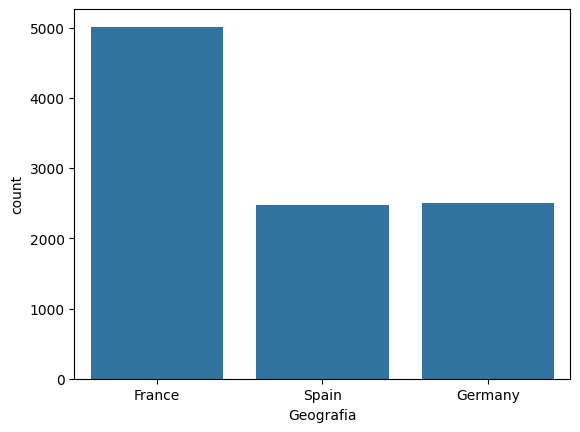

In [112]:
sns.countplot(x='Geografia', data=base);

In [310]:
base.Gênero.value_counts()

Gênero
1    5457
0    4543
Name: count, dtype: int64

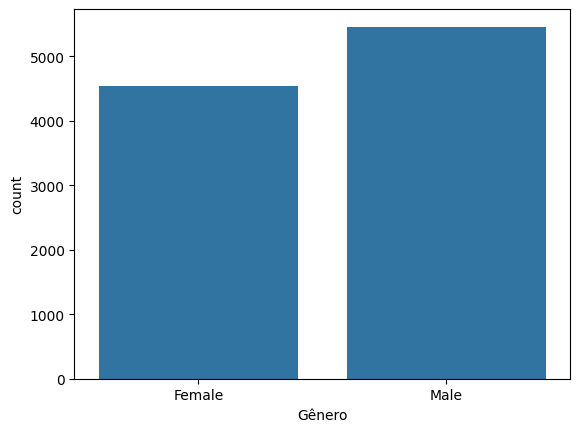

In [113]:
sns.countplot(x='Gênero',data=base)

In [117]:
base.Idade.value_counts().sort_index()

Idade
18    22
19    27
20    40
21    53
22    84
      ..
83     1
84     2
85     1
88     1
92     2
Name: count, Length: 70, dtype: int64

In [311]:
px.box(base, y='Idade')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Idade=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'notched': False,
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'box',
              'x0': ' ',
              'xaxis': 'x',
              'y': array([42, 41, 42, ..., 36, 42, 28], dtype=int64),
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Idade'}}}
})

In [130]:
base.Mandato.value_counts()

Mandato
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

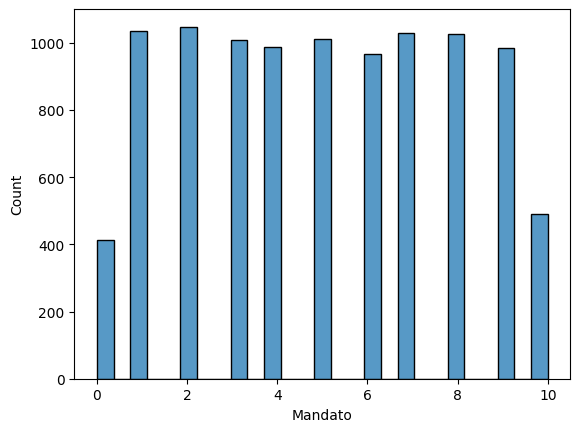

In [133]:
sns.histplot(x='Mandato', data=base);

In [136]:
base.Saldo.value_counts().sort_index()

Saldo
0.00         3617
3768.69         1
12459.19        1
14262.80        1
16893.59        1
             ... 
216109.88       1
221532.80       1
222267.63       1
238387.56       1
250898.09       1
Name: count, Length: 6382, dtype: int64

<Axes: ylabel='Saldo'>

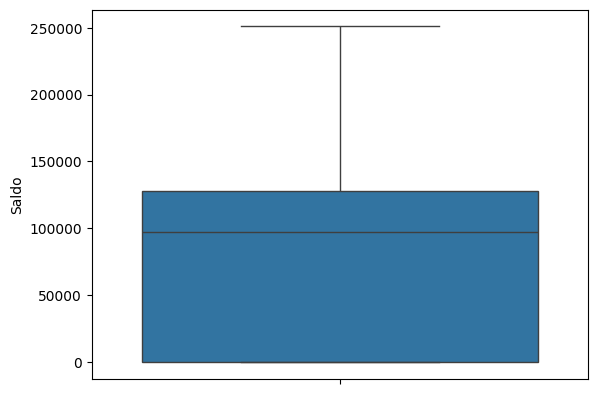

In [138]:
sns.boxplot(y='Saldo', data=base)

In [140]:
base.head(1)

,Score_Credito,Geografia,Gênero,Idade,Mandato,Saldo,Numero_Produtos,TemCartCredito,É_Membro_Ativo,Salario_Estimado,Saiu,Reclamar,pontuação_satisfação_score,Tipo_Cartao,Ponto_Ganho
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


In [142]:
base.Numero_Produtos.value_counts()

Numero_Produtos
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

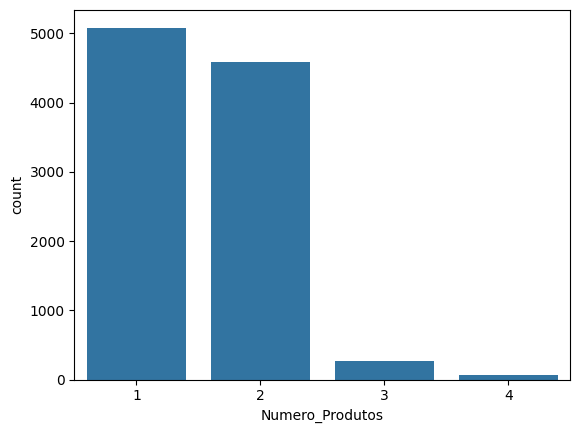

In [147]:
sns.countplot(x='Numero_Produtos', data=base);

In [149]:
base.TemCartCredito.value_counts()

TemCartCredito
1    7055
0    2945
Name: count, dtype: int64

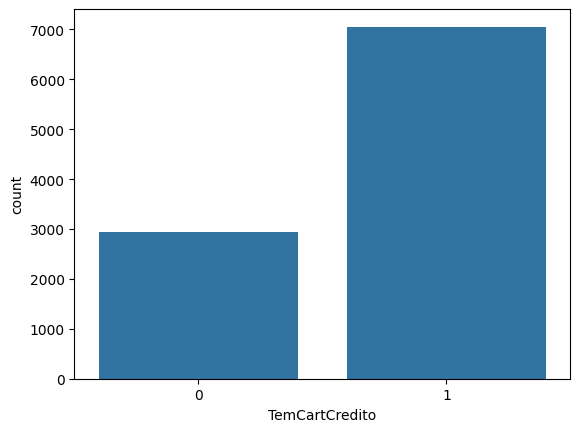

In [153]:
sns.countplot(x='TemCartCredito', data=base);

In [175]:
base.É_Membro_Ativo.value_counts()

É_Membro_Ativo
1    5151
0    4849
Name: count, dtype: int64

<Axes: xlabel='É_Membro_Ativo', ylabel='count'>

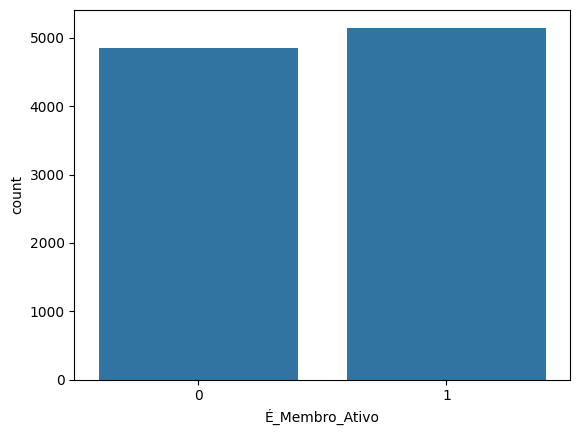

In [178]:
sns.countplot(x='É_Membro_Ativo', data=base)

In [184]:
base.Salario_Estimado.value_counts()

Salario_Estimado
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            ..
120893.07    1
188377.21    1
55902.93     1
4523.74      1
38190.78     1
Name: count, Length: 9999, dtype: int64

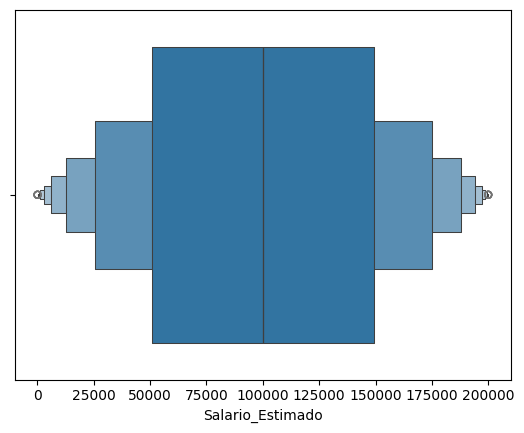

In [187]:
sns.boxenplot(x='Salario_Estimado', data=base);

In [205]:
base.Saiu.value_counts()

Saiu
0    7962
1    2038
Name: count, dtype: int64

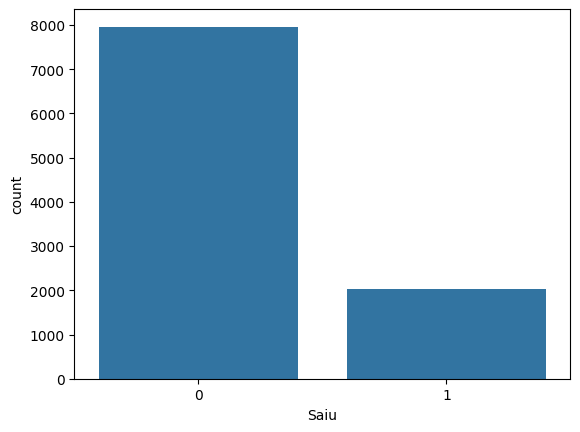

In [208]:
sns.countplot(x='Saiu', data=base);

In [218]:
base.Reclamação.value_counts()

Reclamação
0    7956
1    2044
Name: count, dtype: int64

<Axes: xlabel='Reclamação', ylabel='count'>

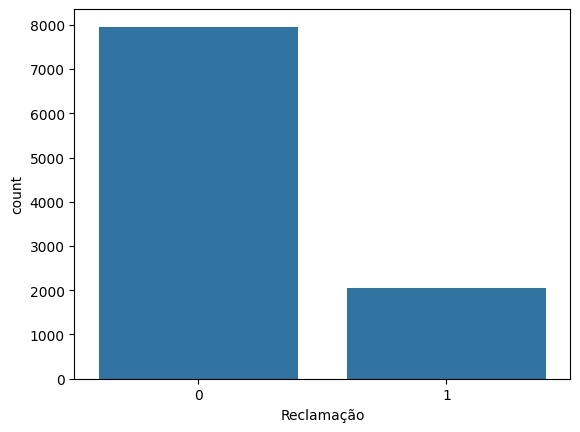

In [220]:
sns.countplot(x='Reclamação', data=base)

In [222]:
base.head(1)

,Score_Credito,Geografia,Gênero,Idade,Mandato,Saldo,Numero_Produtos,TemCartCredito,É_Membro_Ativo,Salario_Estimado,Saiu,Reclamação,pontuação_satisfação_score,Tipo_Cartao,Ponto_Ganho
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1,2,DIAMOND,464


In [226]:
base.pontuação_satisfação_score.value_counts()

pontuação_satisfação_score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

<Axes: xlabel='pontuação_satisfação_score', ylabel='count'>

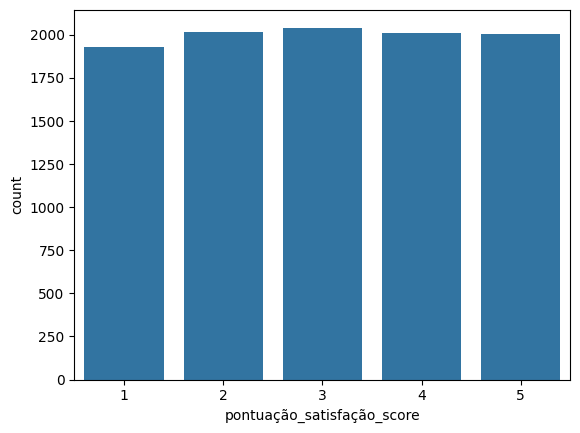

In [227]:
sns.countplot(x='pontuação_satisfação_score', data=base)

In [229]:
base.Tipo_Cartao.value_counts()

Tipo_Cartao
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

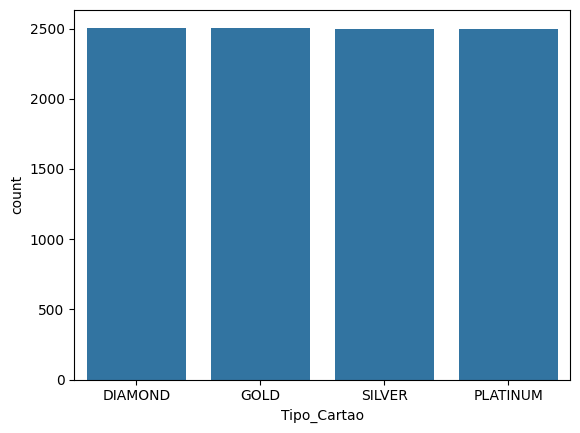

In [232]:
sns.countplot(x='Tipo_Cartao', data=base);

In [234]:
base.Ponto_Ganho.value_counts()

Ponto_Ganho
408    26
709    25
244    23
629    23
503    22
       ..
854     4
996     2
119     1
163     1
206     1
Name: count, Length: 785, dtype: int64

<Axes: ylabel='Ponto_Ganho'>

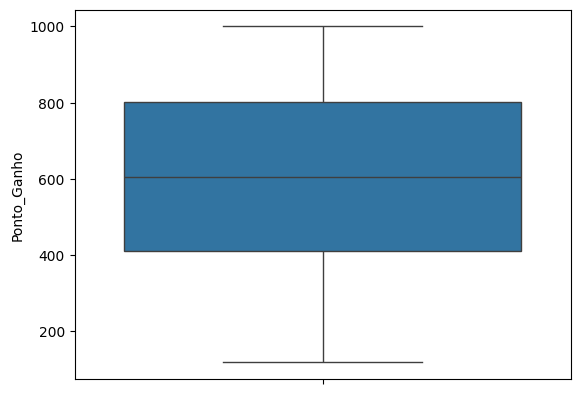

In [237]:
sns.boxplot(y='Ponto_Ganho', data=base)

Transformando dados Categoricos em Numericos

In [239]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Score_Credito               10000 non-null  int64  
 1   Geografia                   10000 non-null  object 
 2   Gênero                      10000 non-null  object 
 3   Idade                       10000 non-null  int64  
 4   Mandato                     10000 non-null  int64  
 5   Saldo                       10000 non-null  float64
 6   Numero_Produtos             10000 non-null  int64  
 7   TemCartCredito              10000 non-null  int64  
 8   É_Membro_Ativo              10000 non-null  int64  
 9   Salario_Estimado            10000 non-null  float64
 10  Saiu                        10000 non-null  int64  
 11  Reclamação                  10000 non-null  int64  
 12  pontuação_satisfação_score  10000 non-null  int64  
 13  Tipo_Cartao                 1000

In [241]:
from sklearn.preprocessing import LabelEncoder

codificador = LabelEncoder()

# Geografia
base['Geografia'] = codificador.fit_transform(base['Geografia'])
# Gênero 
base['Gênero'] = codificador.fit_transform(base['Gênero'])
# Tipo cartao
base['Tipo_Cartao'] = codificador.fit_transform(base['Tipo_Cartao'])

In [244]:
y = base['Saiu']
x = base.drop(columns=['Saiu'])

Sepando dados em treino e teste

In [246]:

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y)


Treinamento dos modelos de machine learn

In [247]:
from sklearn.naive_bayes import GaussianNB

previsao_naive_bays = GaussianNB()
previsao_naive_bays.fit(x_treino, y_treino)

GaussianNB()

In [249]:
from sklearn.neighbors import KNeighborsClassifier

previsao_knn = KNeighborsClassifier()
previsao_knn.fit(x_treino, y_treino)

KNeighborsClassifier()

In [251]:
from sklearn.tree import DecisionTreeClassifier


previsao_tree = DecisionTreeClassifier()
previsao_tree.fit(x_treino, y_treino)

DecisionTreeClassifier()

In [254]:
from sklearn.svm import SVC

previsao_maquina_vt_suporte = SVC()
previsao_maquina_vt_suporte.fit(x_treino, y_treino)

SVC()

In [256]:
from sklearn.neural_network import MLPClassifier

previsao_rede_neural = MLPClassifier()
previsao_rede_neural.fit(x_treino, y_treino)

MLPClassifier()

In [258]:
from sklearn.ensemble import RandomForestClassifier

previsao_random_forest = RandomForestClassifier()
previsao_random_forest.fit(x_treino, y_treino)

RandomForestClassifier()

In [260]:
from sklearn.linear_model import LogisticRegression

previsao_regressão_logistica = LogisticRegression()
previsao_regressão_logistica.fit(x_treino, y_treino)



LogisticRegression()

In [263]:
modelo_naive_bays = previsao_naive_bays.predict(x_teste)
modelo_knn = previsao_knn.predict(x_teste)
modelo_tree = previsao_tree.predict(x_teste)
modelo_maquina_vt_suporte = previsao_maquina_vt_suporte.predict(x_teste)
modelo_rede_neural = previsao_rede_neural.predict(x_teste)
modelo_random_forest = previsao_random_forest.predict(x_teste)
modelo_regressao_logistica = previsao_regressão_logistica.predict(x_teste)

Avaliando modelos de Machine Learn

In [290]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Acurácia do score
print('naive bayes: {:.2%}'.format(accuracy_score(y_teste, modelo_naive_bays)))
print('knn: {}'.format(accuracy_score(y_teste, modelo_knn)))
print('tree : {:.2%}'.format(accuracy_score(y_teste, modelo_tree)))
print('maquina de vetor de suporte: {:.2%}'.format(accuracy_score(y_teste, modelo_maquina_vt_suporte)))
print('rede neural: {:.2%}'.format(accuracy_score(y_teste, modelo_rede_neural)))
print('random forest: {:.2%}'.format(accuracy_score(y_teste, modelo_random_forest)))
print('regressao logistica: {:.2%}'.format(accuracy_score(y_teste, modelo_regressao_logistica)))

naive bayes: 78.88%
knn: 0.756
tree : 99.68%
maquina de vetor de suporte: 79.96%
rede neural: 55.12%
random forest: 99.80%
regressao logistica: 79.00%


In [292]:
# Matrix de confusão
print('naive bayes: \n{}'.format(confusion_matrix(y_teste, modelo_naive_bays)))
print('-'*80)
print('knn: \n{}'.format(confusion_matrix(y_teste, modelo_knn)))
print('-'*80)
print('tree : \n{}'.format(confusion_matrix(y_teste, modelo_tree)))
print('-'*80)
print('maquina de vetor de suporte: \n{}'.format(confusion_matrix(y_teste, modelo_maquina_vt_suporte)))
print('-'*80)
print('rede neural: \n{}'.format(confusion_matrix(y_teste, modelo_rede_neural)))
print('-'*80)
print('random forest: \n{}'.format(confusion_matrix(y_teste, modelo_random_forest)))
print('-'*80)
print('regressao logistica: \n{}'.format(confusion_matrix(y_teste, modelo_regressao_logistica)))

naive bayes: 
[[1934   65]
 [ 463   38]]
--------------------------------------------------------------------------------
knn: 
[[1833  166]
 [ 444   57]]
--------------------------------------------------------------------------------
tree : 
[[1994    5]
 [   3  498]]
--------------------------------------------------------------------------------
maquina de vetor de suporte: 
[[1999    0]
 [ 501    0]]
--------------------------------------------------------------------------------
rede neural: 
[[1073  926]
 [ 196  305]]
--------------------------------------------------------------------------------
random forest: 
[[1995    4]
 [   1  500]]
--------------------------------------------------------------------------------
regressao logistica: 
[[1951   48]
 [ 477   24]]


In [297]:
print('naive bayes: {}'.format(classification_report(y_teste, modelo_naive_bays)))
print('-'*80)
print('knn: {}'.format(classification_report(y_teste, modelo_knn)))
print('-'*80)
print('tree : {}'.format(classification_report(y_teste, modelo_tree)))
print('-'*80)


naive bayes:               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1999
           1       0.37      0.08      0.13       501

    accuracy                           0.79      2500
   macro avg       0.59      0.52      0.50      2500
weighted avg       0.72      0.79      0.73      2500

--------------------------------------------------------------------------------
knn:               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1999
           1       0.26      0.11      0.16       501

    accuracy                           0.76      2500
   macro avg       0.53      0.52      0.51      2500
weighted avg       0.69      0.76      0.72      2500

--------------------------------------------------------------------------------
tree :               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.99      0.99      0.99       

In [299]:
print('maquina de vetor de suporte: {}'.format(classification_report(y_teste, modelo_maquina_vt_suporte)))
print('-'*80)
print('rede neural: {}'.format(classification_report(y_teste, modelo_rede_neural)))
print('-'*80)
print('random forest: {}'.format(classification_report(y_teste, modelo_random_forest)))

maquina de vetor de suporte:               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1999
           1       0.00      0.00      0.00       501

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.64      0.80      0.71      2500

--------------------------------------------------------------------------------
rede neural:               precision    recall  f1-score   support

           0       0.85      0.54      0.66      1999
           1       0.25      0.61      0.35       501

    accuracy                           0.55      2500
   macro avg       0.55      0.57      0.50      2500
weighted avg       0.73      0.55      0.60      2500

--------------------------------------------------------------------------------
random forest:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1      

c:\Users\valne\OneDrive\Documentos\MeuProjetos\analise_preditivas_perdas_clientes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\valne\OneDrive\Documentos\MeuProjetos\analise_preditivas_perdas_clientes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\valne\OneDrive\Documentos\MeuProjetos\analise_preditivas_perdas_clientes\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [300]:
print('regressao logistica: {}'.format(classification_report(y_teste, modelo_regressao_logistica)))

regressao logistica:               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1999
           1       0.33      0.05      0.08       501

    accuracy                           0.79      2500
   macro avg       0.57      0.51      0.48      2500
weighted avg       0.71      0.79      0.72      2500



Verificando se houve Overfiting nos melhores modelos

In [267]:
previsao_tree2 = DecisionTreeClassifier() # taxa de acurácia: 99.68%(teste) vs 99.69%(treino)
previsao_tree2.fit(x_teste, y_teste)

DecisionTreeClassifier()

In [301]:
previsao_random_forest2 = RandomForestClassifier() # tade de acurácia: 99.80%(teste) vs 99.88%(treino)
previsao_random_forest2.fit(x_teste, y_teste)

RandomForestClassifier()

In [303]:
modelo_tree2 = previsao_tree2.predict(x_treino)
modelo_random_forest2 = previsao_random_forest2.predict(x_treino)

In [304]:
print('tree : {:.2%}'.format(accuracy_score(y_treino, modelo_tree2)))
print('random forest: {:.2%}'.format(accuracy_score(y_treino, modelo_random_forest2)))

tree : 99.69%
random forest: 99.88%
